In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import seaborn as sns
import csv
from scipy.stats import linregress
from sklearn import datasets
from sqlalchemy import create_engine

Data obtained from Kaggle which was provided in Json formate by ChristopheIV, https://www.kaggle.com/christopheiv/winemagdata130k

In [2]:
wine_df = pd.read_json ('Resources/winemag-data-130k-v2.json')
wine_df.head(10)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
5,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,None,Northern Spain,Spain,Tandem
6,87,Terre di Giurfo 2013 Belsito Frappato (Vittoria),"Here's a bright, informal red that opens with ...",Kerin O’Keefe,@kerinokeefe,16.0,Belsito,Frappato,Vittoria,None,Sicily & Sardinia,Italy,Terre di Giurfo
7,87,Trimbach 2012 Gewurztraminer (Alsace),This dry and restrained wine offers spice in p...,Roger Voss,@vossroger,24.0,None,Gewürztraminer,Alsace,None,Alsace,France,Trimbach
8,87,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Savory dried thyme notes accent sunnier flavor...,Anna Lee C. Iijima,None,12.0,Shine,Gewürztraminer,None,None,Rheinhessen,Germany,Heinz Eifel
9,87,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,This has great depth of flavor with its fresh ...,Roger Voss,@vossroger,27.0,Les Natures,Pinot Gris,Alsace,None,Alsace,France,Jean-Baptiste Adam


In [3]:
wine_first150k_df = pd.read_csv ('Resources/winemag-data_first150k.csv')
wine_first150k_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
wine_2_df=wine_first150k_df.drop(columns=['Unnamed: 0'])
wine_2_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
wine_2_df.rename(columns={'country':'Country','description':'Description','designamtion':'Designation','points':'Points',
                                  'price':'Price','province':'Province','region_1':'Region_1','region_2':'Region_2',
                                  'variety':'Variety','winery':'Winery'},inplace=True)
wine_2_df.head(10)

,Country,Description,designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [6]:
wine_df.rename(columns={'points':'Points','title':'Title','description':'Description',
                        'taster_name':'TasterName','taster_twitter_handle':'Taster_Twitter_Handle',
                        'price':'Price','designation':'Designation','variety':'Variety','region_1':'Region_1',
                        'region_2':'Region_2','province':'Province','country':'Country','winery':'Winery'}, 
                 inplace=True)
wine_df.head(10)

,Points,Title,Description,TasterName,Taster_Twitter_Handle,Price,Designation,Variety,Region_1,Region_2,Province,Country,Winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks
5,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,None,Northern Spain,Spain,Tandem
6,87,Terre di Giurfo 2013 Belsito Frappato (Vittoria),"Here's a bright, informal red that opens with ...",Kerin O’Keefe,@kerinokeefe,16.0,Belsito,Frappato,Vittoria,None,Sicily & Sardinia,Italy,Terre di Giurfo
7,87,Trimbach 2012 Gewurztraminer (Alsace),This dry and restrained wine offers spice in p...,Roger Voss,@vossroger,24.0,None,Gewürztraminer,Alsace,None,Alsace,France,Trimbach
8,87,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Savory dried thyme notes accent sunnier flavor...,Anna Lee C. Iijima,None,12.0,Shine,Gewürztraminer,None,None,Rheinhessen,Germany,Heinz Eifel
9,87,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,This has great depth of flavor with its fresh ...,Roger Voss,@vossroger,27.0,Les Natures,Pinot Gris,Alsace,None,Alsace,France,Jean-Baptiste Adam


In [7]:
wine_2_df.dtypes

Country         object
Description     object
designation     object
Points           int64
Price          float64
Province        object
Region_1        object
Region_2        object
Variety         object
Winery          object
dtype: object

In [8]:
wine_df.dtypes


Points                     int64
Title                     object
Description               object
TasterName                object
Taster_Twitter_Handle     object
Price                    float64
Designation               object
Variety                   object
Region_1                  object
Region_2                  object
Province                  object
Country                   object
Winery                    object
dtype: object

In [9]:
wine_merge_df=pd.concat([wine_df,wine_2_df,], ignore_index=True)
wine_merge_df.head(10)


,Points,Title,Description,TasterName,Taster_Twitter_Handle,Price,Designation,Variety,Region_1,Region_2,Province,Country,Winery,designation
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia,NaN
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos,NaN
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm,NaN
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian,NaN
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks,NaN
5,87,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,Michael Schachner,@wineschach,15.0,Ars In Vitro,Tempranillo-Merlot,Navarra,None,Northern Spain,Spain,Tandem,NaN
6,87,Terre di Giurfo 2013 Belsito Frappato (Vittoria),"Here's a bright, informal red that opens with ...",Kerin O’Keefe,@kerinokeefe,16.0,Belsito,Frappato,Vittoria,None,Sicily & Sardinia,Italy,Terre di Giurfo,NaN
7,87,Trimbach 2012 Gewurztraminer (Alsace),This dry and restrained wine offers spice in p...,Roger Voss,@vossroger,24.0,None,Gewürztraminer,Alsace,None,Alsace,France,Trimbach,NaN
8,87,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Savory dried thyme notes accent sunnier flavor...,Anna Lee C. Iijima,None,12.0,Shine,Gewürztraminer,None,None,Rheinhessen,Germany,Heinz Eifel,NaN
9,87,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,This has great depth of flavor with its fresh ...,Roger Voss,@vossroger,27.0,Les Natures,Pinot Gris,Alsace,None,Alsace,France,Jean-Baptiste Adam,NaN


information: https://data.world/markpowell/global-wine-points/workspace/file?filename=Wines.xlsx (https://query.data.world/s/mplvtacphx3svygfg3uu4gycii2dbt)
Global Wine Points, DATASET BY MARK POWELL, data provided by data.world, Dataset updated Mar 15, 2021

In [10]:
wine_global_df = pd.read_excel('https://query.data.world/s/mplvtacphx3svygfg3uu4gycii2dbt')
wine_global_df.head(10)


,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery
0,1919-01-01 00:00:00,Spain,Cava,1919 Brut Selecció,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Sparkling Blend,L'Arboc
1,1929-01-01 00:00:00,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929
2,1929-01-01 00:00:00,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929
3,1934-01-01 00:00:00,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes
4,1945-01-01 00:00:00,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Gérard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Gérard Bertrand
5,1952-01-01 00:00:00,Portugal,NaN,Colheita Tawny,96,$415.00,Port,Burmester 1952 Colheita Tawny (Port),Port,Burmester
6,1963-01-01 00:00:00,Portugal,NaN,Colheita Tawny,96,$400.00,Port,Messias 1963 Colheita Tawny (Port),Port,Messias
7,1974-01-01 00:00:00,Portugal,NaN,Colheita Tawny,93,$175.00,Port,Barros 1974 Colheita Tawny (Port),Port,Barros
8,1978-01-01 00:00:00,Portugal,NaN,Colheita Tawny,94,$100.00,Port,Kopke 1978 Colheita Tawny (Port),Port,Kopke
9,1980-01-01 00:00:00,Portugal,NaN,NaN,93,$137.00,Moscatel do Douro,Adega de Favaios 1980 Moscatel do Douro,Moscatel,Adega de Favaios


In [11]:
wine_global_df.dtypes


Vintage        object
Country        object
County         object
Designation    object
Points          int64
Price          object
Province       object
Title          object
Variety        object
Winery         object
dtype: object

In [12]:
wine_merge2_df=pd.concat([wine_merge_df,wine_global_df], ignore_index=True)
wine_merge2_df

,Points,Title,Description,TasterName,Taster_Twitter_Handle,Price,Designation,Variety,Region_1,Region_2,Province,Country,Winery,designation,Vintage,County
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia,NaN,NaN,NaN
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos,NaN,NaN,NaN
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm,NaN,NaN,NaN
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian,NaN,NaN,NaN
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305893,88,Familie Zull 2016 Lust & Laune Rosé (Niederöst...,NaN,NaN,NaN,$15.00,Lust & Laune,Rosé,NaN,NaN,Niederösterreich,Austria,Familie Zull,NaN,2016-01-01 00:00:00,NaN
305894,90,Jäger 2016 Vorder Seiber Federspiel Grüner Vel...,NaN,NaN,NaN,$25.00,Vorder Seiber Federspiel,Grüner Veltliner,NaN,NaN,Wachau,Austria,Jäger,NaN,2016-01-01 00:00:00,NaN
305895,86,Zonin NV Cuvèe 1821 Brut (Prosecco),NaN,NaN,NaN,$15.00,Cuvèe 1821 Brut,Glera,NaN,NaN,Veneto,Italy,Zonin,NaN,1/1/1821,Prosecco
305896,94,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,NaN,NaN,NaN,$14.00,Pedro Ximenez 1827 Sweet Sherry,Sherry,NaN,NaN,Andalucia,Spain,Osborne,NaN,1/1/1827,Jerez


In [13]:
wine_merge2_df.value_counts

<bound method DataFrame.value_counts of         Points                                              Title  \
0           87                  Nicosia 2013 Vulkà Bianco  (Etna)   
1           87      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           87      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           87  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           87  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
...        ...                                                ...   
305893      88  Familie Zull 2016 Lust & Laune Rosé (Niederöst...   
305894      90  Jäger 2016 Vorder Seiber Federspiel Grüner Vel...   
305895      86                Zonin NV Cuvèe 1821 Brut (Prosecco)   
305896      94  Osborne NV Pedro Ximenez 1827 Sweet Sherry She...   
305897      85  Codorníu NV Reserva Cuvée Barcelona 1872 Spark...   

                                              Description          TasterName  \
0       Aromas include tropical fruit, broom, brim

In [14]:
wine_merge2_df=wine_merge_df.drop_duplicates(subset=['Title'])
wine_merge2_df

,Points,Title,Description,TasterName,Taster_Twitter_Handle,Price,Designation,Variety,Region_1,Region_2,Province,Country,Winery,designation
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia,NaN
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos,NaN
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm,NaN
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian,NaN
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129967,90,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Paul Gregutt,@paulgwine,75.0,None,Pinot Noir,Oregon,Oregon Other,Oregon,US,Citation,NaN
129968,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Roger Voss,@vossroger,30.0,Kritt,Gewürztraminer,Alsace,None,Alsace,France,Domaine Gresser,NaN
129969,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Roger Voss,@vossroger,32.0,None,Pinot Gris,Alsace,None,Alsace,France,Domaine Marcel Deiss,NaN
129970,90,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,"Big, rich and off-dry, this is powered by inte...",Roger Voss,@vossroger,21.0,Lieu-dit Harth Cuvée Caroline,Gewürztraminer,Alsace,None,Alsace,France,Domaine Schoffit,NaN


In [15]:
wine_merge2_df.describe()

,Points,Price
count,118841.000000,110582.000000
mean,88.443811,35.588966
std,3.094325,41.899418
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [16]:
wine_merge2_df.to_csv('output/wine_merge.csv',index=False)

In [17]:
wine_countries = wine_merge2_df.groupby("Country")["Winery"].count()
wine_countries

Country
Argentina                  3543
Armenia                       2
Australia                  2183
Austria                    3022
Bosnia and Herzegovina        2
Brazil                       49
Bulgaria                    132
Canada                      226
Chile                      4178
China                         1
Croatia                      70
Cyprus                       10
Czech Republic               11
Egypt                         1
England                      63
France                    19739
Georgia                      76
Germany                    1990
Greece                      429
Hungary                     129
India                         8
Israel                      466
Italy                     17805
Lebanon                      32
Luxembourg                    5
Macedonia                    11
Mexico                       68
Moldova                      56
Morocco                      24
New Zealand                1276
Peru                         16


In [18]:
wine_points = wine_merge2_df.groupby("Country")["Points"].median()
wine_points

Country
Argentina                 86.0
Armenia                   87.5
Australia                 89.0
Austria                   90.0
Bosnia and Herzegovina    86.5
Brazil                    85.0
Bulgaria                  89.0
Canada                    90.0
Chile                     86.0
China                     89.0
Croatia                   88.0
Cyprus                    87.0
Czech Republic            88.0
Egypt                     84.0
England                   92.0
France                    89.0
Georgia                   88.0
Germany                   90.0
Greece                    87.0
Hungary                   89.0
India                     90.0
Israel                    89.0
Italy                     88.0
Lebanon                   88.0
Luxembourg                89.0
Macedonia                 87.0
Mexico                    85.0
Moldova                   88.0
Morocco                   89.0
New Zealand               88.0
Peru                      84.0
Portugal                  88.0


In [19]:
points_maximums = wine_merge2_df.max()
points_maximums

Points                                                       100
Description    “Wow” is the first word that comes to mind whe...
Price                                                       3300
Winery                                                     Štoka
dtype: object

In [20]:
wine_merge_titles = pd.DataFrame({'Title':wine_merge2_df.Title.unique()})
wine_merge_titles

,Title
0,Nicosia 2013 Vulkà Bianco (Etna)
1,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,St. Julian 2013 Reserve Late Harvest Riesling ...
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...,...
118836,Citation 2004 Pinot Noir (Oregon)
118837,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
118838,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
118839,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...


In [21]:
wine_merge_titles_unique  = wine_merge2_df.groupby('Title')['Price'].sum().to_frame().reset_index().sort_values(by='Price')

wine_merge_titles_unique.head() 

,Title,Price
19317,Castorani 2014 Le Paranze (Montepulciano d'Ab...,0.0
94727,SalvaTerra 2014 Pinot Grigio (Delle Venezie),0.0
94726,SalvaTerra 2007 Valpolicella Classico Superio...,0.0
94725,Salton NV Poética Rosé Sparkling (Brazil),0.0
94724,Salton NV Intenso Brut Sparkling (Serra Gaúcha),0.0


In [22]:
wine_merge_titles_unique.to_csv('output/wine_merge_titles_unique_price_all.csv',index=False)

In [23]:

wine_100=wine_merge2_df.loc[wine_merge2_df['Points'] == 100]
wine_100

,Points,Title,Description,TasterName,Taster_Twitter_Handle,Price,Designation,Variety,Region_1,Region_2,Province,Country,Winery,designation
345,100,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,This wine contains some material over 100 year...,Joe Czerwinski,@JoeCz,350.0,Rare,Muscat,Rutherglen,None,Victoria,Australia,Chambers Rosewood Vineyards,NaN
7335,100,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Thick as molasses and dark as caramelized brow...,None,None,210.0,Occhio di Pernice,Prugnolo Gentile,Vin Santo di Montepulciano,None,Tuscany,Italy,Avignonesi,NaN
36528,100,Krug 2002 Brut (Champagne),This is a fabulous wine from the greatest Cham...,Roger Voss,@vossroger,259.0,Brut,Champagne Blend,Champagne,None,Champagne,France,Krug,NaN
39286,100,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,"A perfect wine from a classic vintage, the 200...",None,None,460.0,Masseto,Merlot,Toscana,None,Tuscany,Italy,Tenuta dell'Ornellaia,NaN
42197,100,Casa Ferreirinha 2008 Barca-Velha Red (Douro),This is the latest release of what has long be...,Roger Voss,@vossroger,450.0,Barca-Velha,Portuguese Red,None,None,Douro,Portugal,Casa Ferreirinha,NaN
45781,100,Biondi Santi 2010 Riserva (Brunello di Montal...,"This gorgeous, fragrant wine opens with classi...",Kerin O’Keefe,@kerinokeefe,550.0,Riserva,Sangiovese,Brunello di Montalcino,None,Tuscany,Italy,Biondi Santi,NaN
45798,100,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Tasted in a flight of great and famous Napa wi...,None,None,200.0,None,Cabernet Sauvignon,Napa Valley,Napa,California,US,Cardinale,NaN
58352,100,Château Léoville Barton 2010 Saint-Julien,"This is a magnificently solid wine, initially ...",Roger Voss,@vossroger,150.0,None,Bordeaux-style Red Blend,Saint-Julien,None,Bordeaux,France,Château Léoville Barton,NaN
89728,100,Louis Roederer 2008 Cristal Vintage Brut (Cha...,This latest incarnation of the famous brand is...,Roger Voss,@vossroger,250.0,Cristal Vintage Brut,Champagne Blend,Champagne,None,Champagne,France,Louis Roederer,NaN
89729,100,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,This new release from a great vintage for Char...,Roger Voss,@vossroger,617.0,Le Mesnil Blanc de Blancs Brut,Chardonnay,Champagne,None,Champagne,France,Salon,NaN


In [24]:
wine_100.to_csv('output/wine_100.csv',index=False)

In [25]:
wine_100.Title.unique()

array(['Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen)',
       'Avignonesi 1995 Occhio di Pernice  (Vin Santo di Montepulciano)',
       'Krug 2002 Brut  (Champagne)',
       "Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana)",
       'Casa Ferreirinha 2008 Barca-Velha Red (Douro)',
       'Biondi Santi 2010 Riserva  (Brunello di Montalcino)',
       'Cardinale 2006 Cabernet Sauvignon (Napa Valley)',
       'Château Léoville Barton 2010  Saint-Julien',
       'Louis Roederer 2008 Cristal Vintage Brut  (Champagne)',
       'Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne)',
       'Château Lafite Rothschild 2010  Pauillac',
       'Casanova di Neri 2007 Cerretalto  (Brunello di Montalcino)',
       'Château Cheval Blanc 2010  Saint-Émilion',
       'Château Léoville Las Cases 2010  Saint-Julien',
       'Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))',
       'Quinta do Noval 2011 Nacional Vintage  (Port)',
       'Verité 2007 La Muse Red (Sonoma 

In [26]:
wine_100_info = wine_100.groupby('Title').apply(lambda x: x['Price'].unique())
wine_100_info

Title
Avignonesi 1995 Occhio di Pernice  (Vin Santo di Montepulciano)      [210.0]
Biondi Santi 2010 Riserva  (Brunello di Montalcino)                  [550.0]
Cardinale 2006 Cabernet Sauvignon (Napa Valley)                      [200.0]
Casa Ferreirinha 2008 Barca-Velha Red (Douro)                        [450.0]
Casanova di Neri 2007 Cerretalto  (Brunello di Montalcino)           [270.0]
Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA))               [80.0]
Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen)              [350.0]
Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))            [80.0]
Château Cheval Blanc 2010  Saint-Émilion                            [1500.0]
Château Lafite Rothschild 2010  Pauillac                            [1500.0]
Château Léoville Barton 2010  Saint-Julien                           [150.0]
Château Léoville Las Cases 2010  Saint-Julien                        [359.0]
Krug 2002 Brut  (Champagne)                                          [

In [27]:
wine_100_info.to_csv('output/wine_100_info_wine_titles.csv')

In [28]:
wine_range_90_99=wine_merge2_df[(wine_merge2_df.Points>= 90) & (wine_merge2_df.Points <= 99)]
wine_range_90_99

,Points,Title,Description,TasterName,Taster_Twitter_Handle,Price,Designation,Variety,Region_1,Region_2,Province,Country,Winery,designation
119,92,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Medium-gold in color. Complex and inviting nos...,None,None,80.0,Schoenenbourg Grand Cru Vendanges Tardives,Riesling,Alsace,None,Alsace,France,Dopff & Irion,NaN
120,92,Ceretto 2003 Bricco Rocche Prapó (Barolo),"Slightly backward, particularly given the vint...",None,None,70.0,Bricco Rocche Prapó,Nebbiolo,Barolo,None,Piedmont,Italy,Ceretto,NaN
121,92,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,The vineyard is one of the better Chardonnay s...,None,None,36.0,Stuhlmuller Vineyard,Chardonnay,Alexander Valley,Sonoma,California,US,Matrix,NaN
122,92,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Defines Rockpile Zinfandel in intensity of fru...,None,None,39.0,Rockpile Cemetary Vineyard,Zinfandel,Rockpile,Sonoma,California,US,Mauritson,NaN
123,92,Henry's Drive Vignerons 2006 Parson's Flat Shi...,The blend is roughly two-thirds Shiraz and one...,Joe Czerwinski,@JoeCz,40.0,Parson's Flat,Shiraz-Cabernet Sauvignon,Padthaway,None,South Australia,Australia,Henry's Drive Vignerons,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129967,90,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Paul Gregutt,@paulgwine,75.0,None,Pinot Noir,Oregon,Oregon Other,Oregon,US,Citation,NaN
129968,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Roger Voss,@vossroger,30.0,Kritt,Gewürztraminer,Alsace,None,Alsace,France,Domaine Gresser,NaN
129969,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Roger Voss,@vossroger,32.0,None,Pinot Gris,Alsace,None,Alsace,France,Domaine Marcel Deiss,NaN
129970,90,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,"Big, rich and off-dry, this is powered by inte...",Roger Voss,@vossroger,21.0,Lieu-dit Harth Cuvée Caroline,Gewürztraminer,Alsace,None,Alsace,France,Domaine Schoffit,NaN


In [29]:
wine_range_90_99.to_csv('output/wine_range_90_99.csv',index=False)

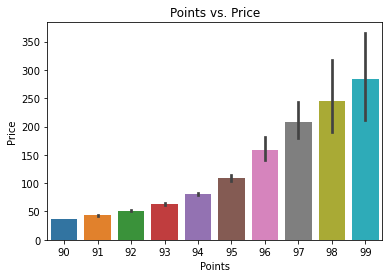

In [34]:
Price_Points=sns.barplot(x = 'Points', y = 'Price', data = wine_range_90_99)
plt.title("Points vs. Price")
plt.savefig("chart/Price_Points.png")


In [35]:
consumption_per_country=pd.read_csv('output/consumption_wine_per_country.csv')
consumption_per_country.head(10)

,Country,Wine_Servings,Total_Litres_of_Pure_Alcohol
0,Afghanistan,0,0.0
1,Albania,54,4.9
2,Algeria,14,0.7
3,Andorra,312,12.4
4,Angola,45,5.9
5,Antigua & Barbuda,45,4.9
6,Argentina,221,8.3
7,Armenia,11,3.8
8,Australia,212,10.4
9,Austria,191,9.7


In [ ]:
sns.barplot(x = 'Country', y = 'Total_Litres_of_Pure_Alcohol', data = consumption_per_country)
plt.title("Country vs. Total Litres of Pure Alcohol")
plt.savefig("chart/Country_Liters.png")